# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** 37

**Author 1 (sciper):** Michael Biselx    (283812)  
**Author 2 (sciper):** Bastien Darbellay (288406)   
**Author 3 (sciper):** Maria   Guerraoui (274578)   

**Release date:** 11.03.2022
**Due date:** 25.03.2022 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.

[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [ ]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')

if not os.path.exists(tar_path):
    raise Exception('Path to is not valid {}'.format(tar_path))
    
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1: Brain segmentation

Your goal: compute the size of the brain (without the skull) in pixels in a 2D image of a human head taken by
Magnetic Resonance Imaging (MRI) using:
* Region growing (5 pts)
* Contour detection (5 pts)
* An additional method of your choice (5 pts)

Each section should display the resulting segmentation as well as the size in pixel of the detected region. Comment
each method limitations and/or advantages.

### 1.1 Brain image visualization

In [ ]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

# Display MRI image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing (5pts)

In [ ]:
import numpy as np
import skimage.segmentation

# use the existing image segmentation algorithm in skimage
#  this tool extracts all contiguous pixels whose value is 
#  within a certain tolerance of the seed pixel
seed_point = (150, 150)
mask = skimage.segmentation.flood(brain_im, seed_point, tolerance=0.08*brain_im.max()) # heuristic thresholding

# display the mask
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow(brain_im,  cmap='gray')
ax[1].imshow(mask, cmap='gray')
ax[1].plot(seed_point[0], seed_point[1], 'rx')
ax[0].set_title('Briain ({} px, {} px)'.format(im_h, im_w))
ax[1].set_title('Briain Fill ({} px, {} px)'.format(im_h, im_w))
for axis in ax : axis.axis('off')
plt.show()

# count the number of brain pixels 
print("There are {} brain pixels of {} total pixels in this image ({:.2f}%).".format(np.sum(mask), im_h*im_w, 100*np.sum(mask)/(im_h*im_w)))


### 1.3 Contour detection (5pts)

In [ ]:
# Add your implementation and discussion
import skimage.measure
import skimage.filters

edges_sobl = skimage.filters.sobel(brain_im)
edges_edg  = (edges_sobl > (0.09*edges_sobl.max())).astype(int); # heuristic thresholding again
mask       = skimage.segmentation.flood(edges_edg, seed_point, tolerance=0) 

fig, ax = plt.subplots(1, 3, figsize=(18, 8))
ax[0].imshow(brain_im,  cmap='gray')
ax[1].imshow(edges_edg, cmap='gray')
ax[2].imshow(mask, cmap='gray')
ax[2].plot(seed_point[0], seed_point[1], 'rx')
ax[0].set_title('Briain ({} px, {} px)'.format(im_h, im_w))
ax[1].set_title('Outlines ({} px, {} px)'.format(im_h, im_w))
ax[2].set_title('Briain Fill ({} px, {} px)'.format(im_h, im_w))
ax[2].plot(seed_point[0], seed_point[1], 'rx')
for axis in ax : axis.axis('off')
plt.show()

# count the number of brain pixels 
print("There are {} brain pixels of {} total pixels in this image ({:.2f}%).".format(np.sum(mask), im_h*im_w, 100*np.sum(mask)/(im_h*im_w)))


### 1.4 Additional method (5pts)

In [ ]:
import skimage.morphology
# Add your implementation and discussion

footprint = skimage.morphology.disk(7) # we're working with rounded shapes - use the disk
blk_tphat = skimage.morphology.black_tophat(brain_im, footprint) # use black tophat morphology to separate the lighter brain from the surrounding darker dura mater
mask      = skimage.segmentation.flood(blk_tphat, seed_point, tolerance=0.09*blk_tphat.max()) # heuristic thresholding for the third time


# display the mask
fig, ax = plt.subplots(1, 3, figsize=(18, 8))
ax[0].imshow(brain_im,  cmap='gray')
ax[1].imshow(blk_tphat, cmap='gray')
ax[2].imshow(mask, cmap='gray')
ax[2].plot(seed_point[0], seed_point[1], 'rx')
ax[0].set_title('Briain ({} px, {} px)'.format(im_h, im_w))
ax[1].set_title('Black Tophat ({} px, {} px)'.format(im_h, im_w))
ax[2].set_title('Briain Fill ({} px, {} px)'.format(im_h, im_w))
for axis in ax : axis.axis('off')
plt.show()

# count the number of brain pixels 
print("There are {} brain pixels of {} total pixels in this image ({:.2f}%).".format(np.sum(mask), im_h*im_w, 100*np.sum(mask)/(im_h*im_w)))


---
## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different
colors. We ask you to create a routine to:

1. Count the number of shapes of each color (5pts).
2. Compute the total area (in pixels) of each color (5pts).

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity
normalization should probably be used.

hint: RGB color space might not be optimal. Consider using HSV or LAB color space.

### 2.1 Visualization

In [ ]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

In [ ]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color (5 pts)

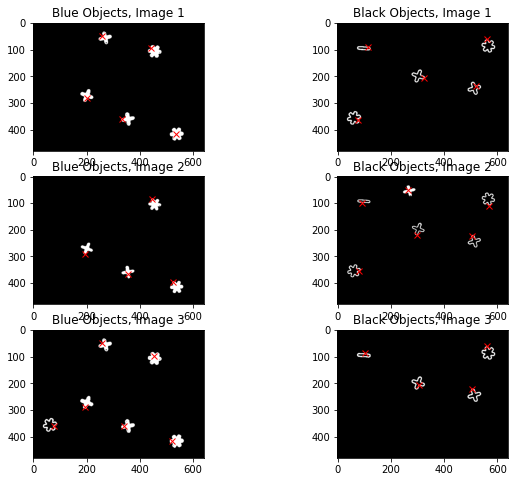

In [160]:
import skimage.filters
import skimage.color
# Add your implementation and discussion


def equalize_img(img) : 
    img_cp = img.copy()
    mask = np.full(img.shape[0:2], False)
    for c in range(0,3) : 
        thresh = skimage.filters.threshold_otsu(img[:,:,c])
        mask = np.logical_or(mask, np.logical_and(img[:,:,c] > 0, img[:,:,c] < thresh))
    for c in range(0,3) : 
        plow, phigh = np.percentile(img[mask,c], (2, 99))
        img_cp[mask,c] = skimage.exposure.rescale_intensity(img[mask,c], (plow, phigh))
    img_cp[np.logical_not(mask)] = 255;
    
    return img_cp

def find_obj(img) :

    # detect edges 
    edges_sobl = skimage.filters.sobel(img);
    edges_gray = skimage.color.rgb2gray(edges_sobl)
    #thresh = skimage.filters.threshold_minimum(edges_gray)  #TODO : maybe test others 
    thresh = skimage.filters.threshold_otsu(edges_gray)  #TODO : maybe test others 
    edges_bin  = (edges_gray > thresh).astype(int)

    
    # count black obj
    edges_blck = skimage.morphology.white_tophat(edges_bin, skimage.morphology.disk(3))
    edges_blck = skimage.morphology.area_opening(edges_blck, area_threshold=200)
    labld_blck = skimage.measure.label(edges_blck, background=0)   
    lmax_blck  = skimage.feature.peak_local_max(edges_blck, labels=labld_blck, num_peaks_per_label=1, exclude_border=False)

    #count blue objects
    objct_blue = edges_bin - edges_blck;
    objct_blue = skimage.morphology.area_opening(objct_blue, area_threshold=200)
    edges_blue = skimage.filters.sobel(objct_blue);
    edges_blue = (edges_blue > .2*edges_blue.max()).astype(int)
    labld_blue = skimage.measure.label(edges_blue, background=0)
    lmax_blue  = skimage.feature.peak_local_max(edges_blue, labels=labld_blue, num_peaks_per_label=1, exclude_border=False)

    
    return edges_blue, lmax_blue, edges_blck, lmax_blck    
    
    
    
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
i = 0
for im, nm in zip(images, im_names):
    img_eq = equalize_img(im)
    edges_blue, lmax_blue, edges_blck, lmax_blck = find_obj(img_eq)
    
    axes[0,i].imshow(img_eq) # show equalized img
    
    axes[1,i].imshow(edges_blue, cmap='gray') # show blue shapes 
    for p in lmax_blue : 
        axes[1,i].plot(p[1], p[0], 'rx')

    axes[2,i].imshow(edges_blck, cmap='gray') # show black shapes 
    for p in lmax_blck : 
        axes[2,i].plot(p[1], p[0], 'rx')
    
    for ax in axes[i]: ax.axis('off')
    axes[0,i].set_title(nm)
    i = i+1;
    
    print("in image '{}', {} blue objects were detected and {} black objects were detected".format(nm, lmax_blue.shape[0], lmax_blck.shape[0]))


plt.show() 



### 2.3 Total area (in pixels) of each color (5 pts)

In [ ]:
# Add your implementation and discussion


# divide in blue and black objects as before. Do filling for black objects. Add pixel values (divide by white value) = number of pixels
# OR (probably better) take red crosses and do a fill at those points on the original image